In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
X_train.shape


(60000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
single_image= X_train[0]

In [ ]:
single_image.shape

(28, 28)

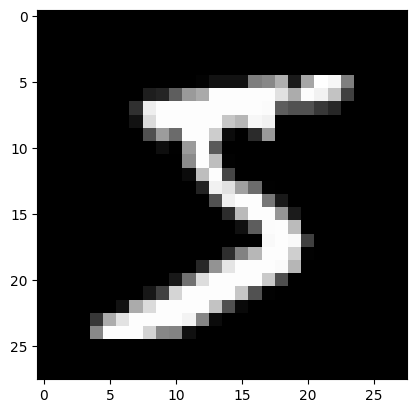

In [ ]:
plt.imshow(single_image,cmap='gray')

In [ ]:


y_train.shape

(60000,)

In [ ]:
X_train.min()

0

In [ ]:
X_train.max()

255

In [ ]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [ ]:
X_train_scaled.min()

0.0

In [ ]:
X_train_scaled.max()


1.0

In [ ]:
y_train[0]

5

In [ ]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)

In [ ]:
type(y_train_onehot)

numpy.ndarray

In [ ]:
y_train_onehot.shape

(60000, 10)

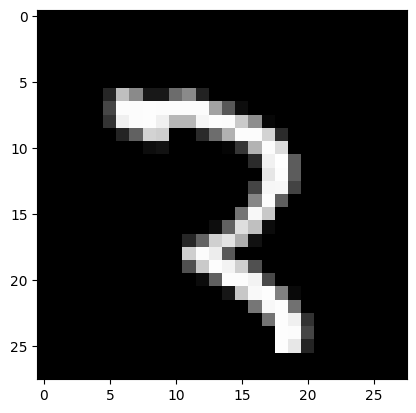

In [ ]:
single_image = X_train[500]
plt.imshow(single_image,cmap='gray')


In [ ]:
y_train_onehot[500]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [ ]:
print('Name:Logeshwari')
print('Register No:212221230055')

Name:Logeshwari
Register No:212221230055


In [ ]:
model = keras.Sequential()
model.add(layers.Input(shape=(28,28,1)))
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 5408)              0         
                                                                 
 dense_3 (Dense)             (None, 32)                173088    
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                      

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics='accuracy')

In [ ]:
model.fit(X_train_scaled ,y_train_onehot, epochs=5,batch_size=64,validation_data=(X_test_scaled,y_test_onehot))

Epoch 1/5
938/938 [==============================] - 24s 23ms/step - loss: 0.2234 - accuracy: 0.9330 - val_loss: 0.1009 - val_accuracy: 0.9694
Epoch 2/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0717 - accuracy: 0.9783 - val_loss: 0.0579 - val_accuracy: 0.9801
Epoch 3/5
938/938 [==============================] - 22s 24ms/step - loss: 0.0499 - accuracy: 0.9844 - val_loss: 0.0537 - val_accuracy: 0.9829
Epoch 4/5
938/938 [==============================] - 22s 23ms/step - loss: 0.0378 - accuracy: 0.9880 - val_loss: 0.0458 - val_accuracy: 0.9841
Epoch 5/5
938/938 [==============================] - 20s 21ms/step - loss: 0.0286 - accuracy: 0.9911 - val_loss: 0.0509 - val_accuracy: 0.9836


In [ ]:
metrics = pd.DataFrame(model.history.history)

In [ ]:
print('Logeshwari.P 212221230055')
metrics.head()

Logeshwari.P 212221230055


,loss,accuracy,val_loss,val_accuracy
0,0.223359,0.932967,0.100934,0.9694
1,0.071675,0.978300,0.057950,0.9801
2,0.049875,0.984417,0.053732,0.9829
3,0.037774,0.988000,0.045772,0.9841
4,0.028605,0.991100,0.050885,0.9836


Logeshwari.P 212221230055


<Axes: >

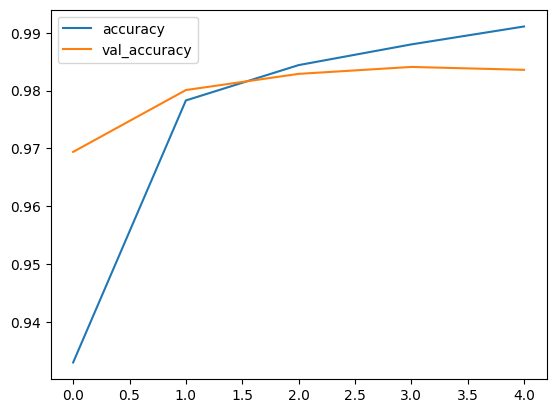

In [ ]:
print('Logeshwari.P 212221230055')
metrics[['accuracy','val_accuracy']].plot()

Logeshwari.P 212221230055


<Axes: >

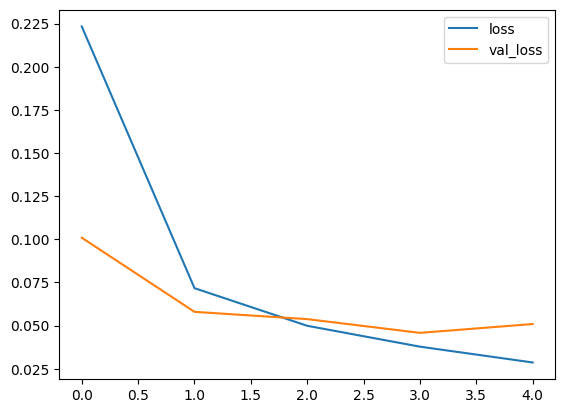

In [ ]:
print('Logeshwari.P 212221230055')

metrics[['loss','val_loss']].plot()

In [ ]:
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)


313/313 [==============================] - 2s 7ms/step


In [ ]:
print('Logeshwari.P 212221230055')


print(confusion_matrix(y_test,x_test_predictions))

Logeshwari.P 212221230055
[[ 969    0    1    2    1    1    4    1    0    1]
 [   0 1125    2    3    1    0    3    1    0    0]
 [   1    0 1022    2    1    0    0    5    1    0]
 [   0    0    1 1004    0    3    0    0    2    0]
 [   0    0    0    0  977    0    1    1    0    3]
 [   0    0    1   11    0  878    2    0    0    0]
 [   6    2    0    0    5    2  943    0    0    0]
 [   1    0    8    2    0    0    0 1015    1    1]
 [   5    0    9    7    6    1    6    5  931    4]
 [   1    2    0    6   11    7    0    6    4  972]]


In [ ]:
img = image.load_img('img1.jpeg')

In [ ]:
img = image.load_img('img1.jpeg')
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)

1/1 [==============================] - 0s 22ms/step


In [ ]:
print(x_single_prediction)

[8]


Logeshwari.P 212221230055


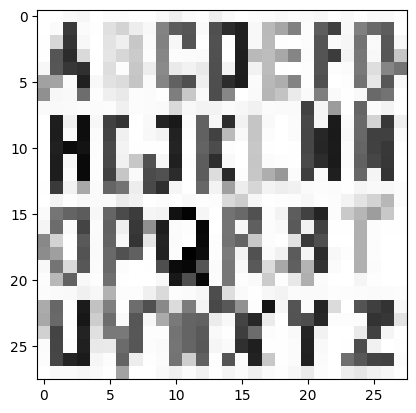

In [ ]:
print('Logeshwari.P 212221230055')
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [ ]:
img_28_gray_inverted = 255.0-img_28_gray
img_28_gray_inverted_scaled = img_28_gray_inverted.numpy()/255.0

In [ ]:
x_single_prediction = np.argmax(model.predict(img_28_gray_inverted_scaled.reshape(1,28,28,1)),axis=1)

1/1 [==============================] - 0s 21ms/step


In [ ]:
print(x_single_prediction)

[7]
